# Lab 7 - PCA & LDA

# Submitted by
 - Name: Parul Joshi
 - Register Number: 21122041
 - Class: MSC DS Sem 2

## LAB OVERVIEW

### Objectives
  - Part A. Perform PCA and LDA on Breast Cancer Dataset, write down your obsevations. While loading, use the toy dataset available in SKLearn (load_breast_cancer)
  - Part B. Illustrate the effect of changing various method parameters of PCA and LDA. Compare the accuracies, and provide visualizations and interpretations for the evaluation metrices.

### Problem Definition
 - Perform PCA and LDA.
 - Demonstrate the breast cancer dataset.

### Approach
 - Import necessry libraries.
 - Works on the dataset.
 - Using PCA and LDA to build the model.
 - Comparing accuracy in PCA and LDA.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score

In [2]:
# import breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
# load data
cancer = load_breast_cancer()
# create dataframe from the data
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploratory Data Analysis

In [9]:
# count missing values in decending order
df.isnull().sum().sort_values(ascending=False)

mean radius                0
mean texture               0
worst symmetry             0
worst concave points       0
worst concavity            0
worst compactness          0
worst smoothness           0
worst area                 0
worst perimeter            0
worst texture              0
worst radius               0
fractal dimension error    0
symmetry error             0
concave points error       0
concavity error            0
compactness error          0
smoothness error           0
area error                 0
perimeter error            0
texture error              0
radius error               0
mean fractal dimension     0
mean symmetry              0
mean concave points        0
mean concavity             0
mean compactness           0
mean smoothness            0
mean area                  0
mean perimeter             0
worst fractal dimension    0
dtype: int64

In [13]:
# target column
df['target'] = pd.Series(cancer.target)
# target_name column
df['target_names'] = pd.Series(cancer.target_names)
# count target names (We don't need this column ('target_names'). I'll drop it later)
df['target_names'].value_counts()

benign       1
malignant    1
Name: target_names, dtype: int64

In [14]:
# target_names replace acording to target
df['target_names'] = df['target'].replace({0: 'malignant', 1: 'benign'})

In [15]:
# count target names column
df['target_names'].value_counts()

benign       357
malignant    212
Name: target_names, dtype: int64

In [16]:
# count target column
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [18]:
# Separete malignant and benign from target
Malingnant=df[df['target'] == 0]
Benign=df[df['target'] == 1]

# Shape of malignant and benign
print(Benign.shape)
print(Malingnant.shape)

(357, 32)
(212, 32)


### Visualization

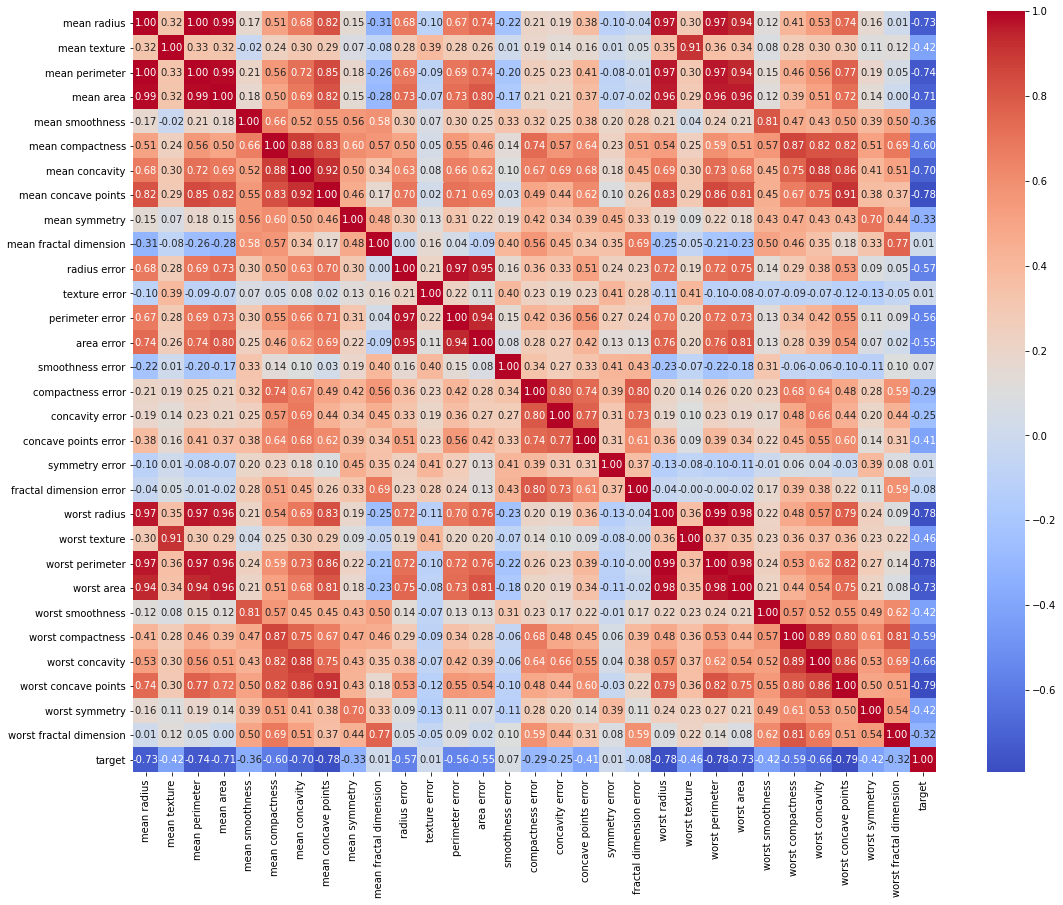

In [19]:
# correaltion matrix
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

C:\Users\SUBHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SUBHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SUBHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

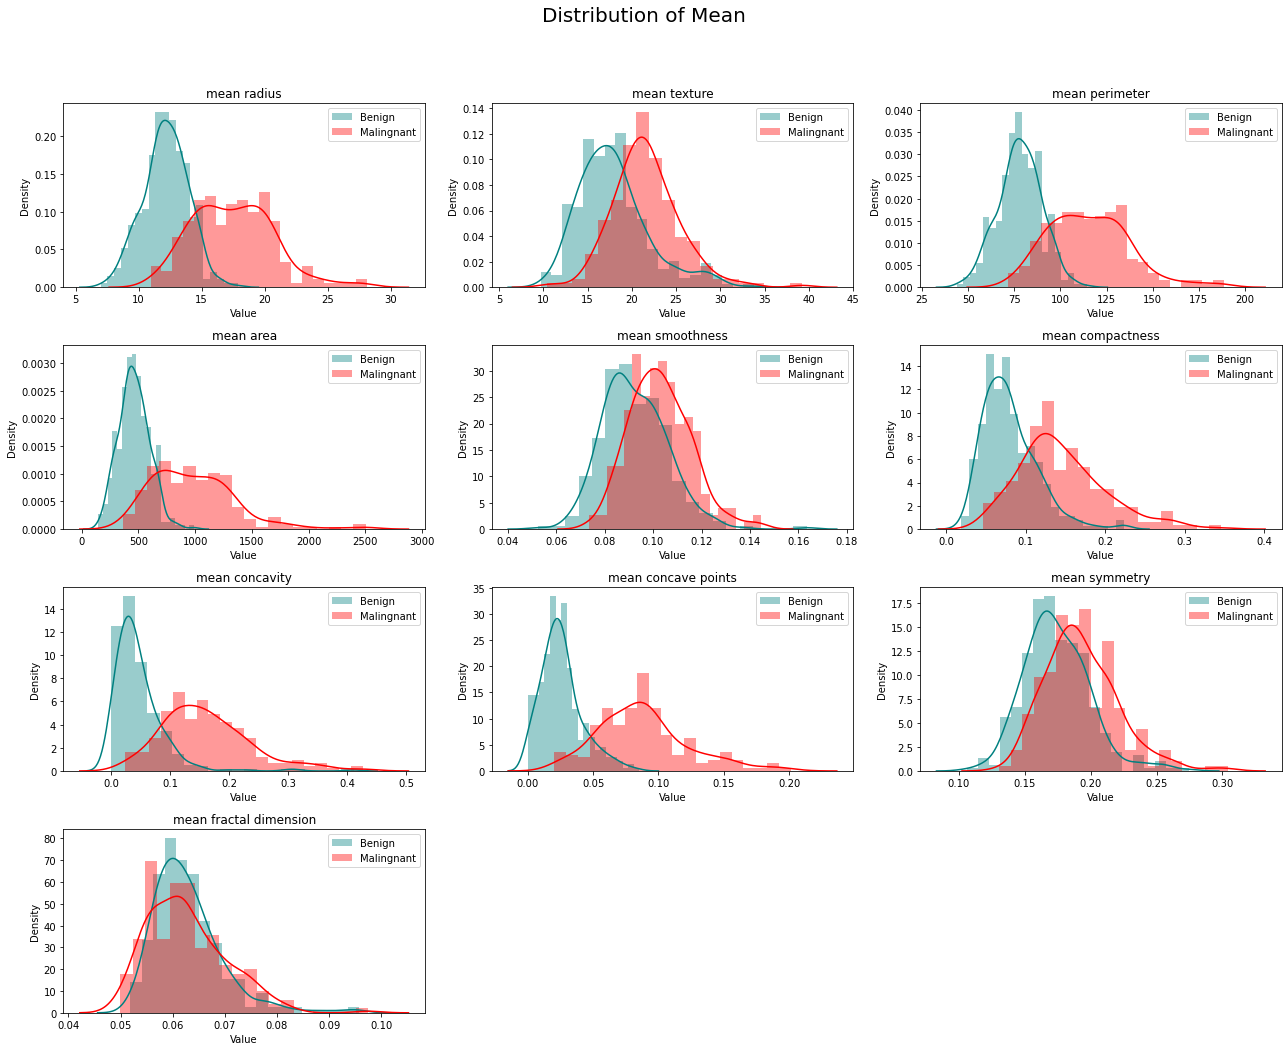

In [20]:
# distribution of all mean columns with malingnant and benign
# Figure size
fig = plt.figure(figsize = (18,14),tight_layout=True)
# Enumerate starting at 0 to 10, add 1 for subplotting
for i,b in enumerate(list(df.columns[0:10])):
    i = i + 1
    ax = fig.add_subplot(4,3,i)
    
    sns.distplot(df[b][df['target'] == 1],label = 'Benign', color = 'teal', bins = 20,hist = True )
    sns.distplot(df[b][df['target'] == 0],label = 'Malingnant', color = "r", bins = 20,hist = True)
    
    ax.set_xlabel('Value')    
    ax.set_title(b)
    plt.legend()
plt.suptitle('Distribution of Mean', y=1.04, size=20)
plt.tight_layout()
plt.show()

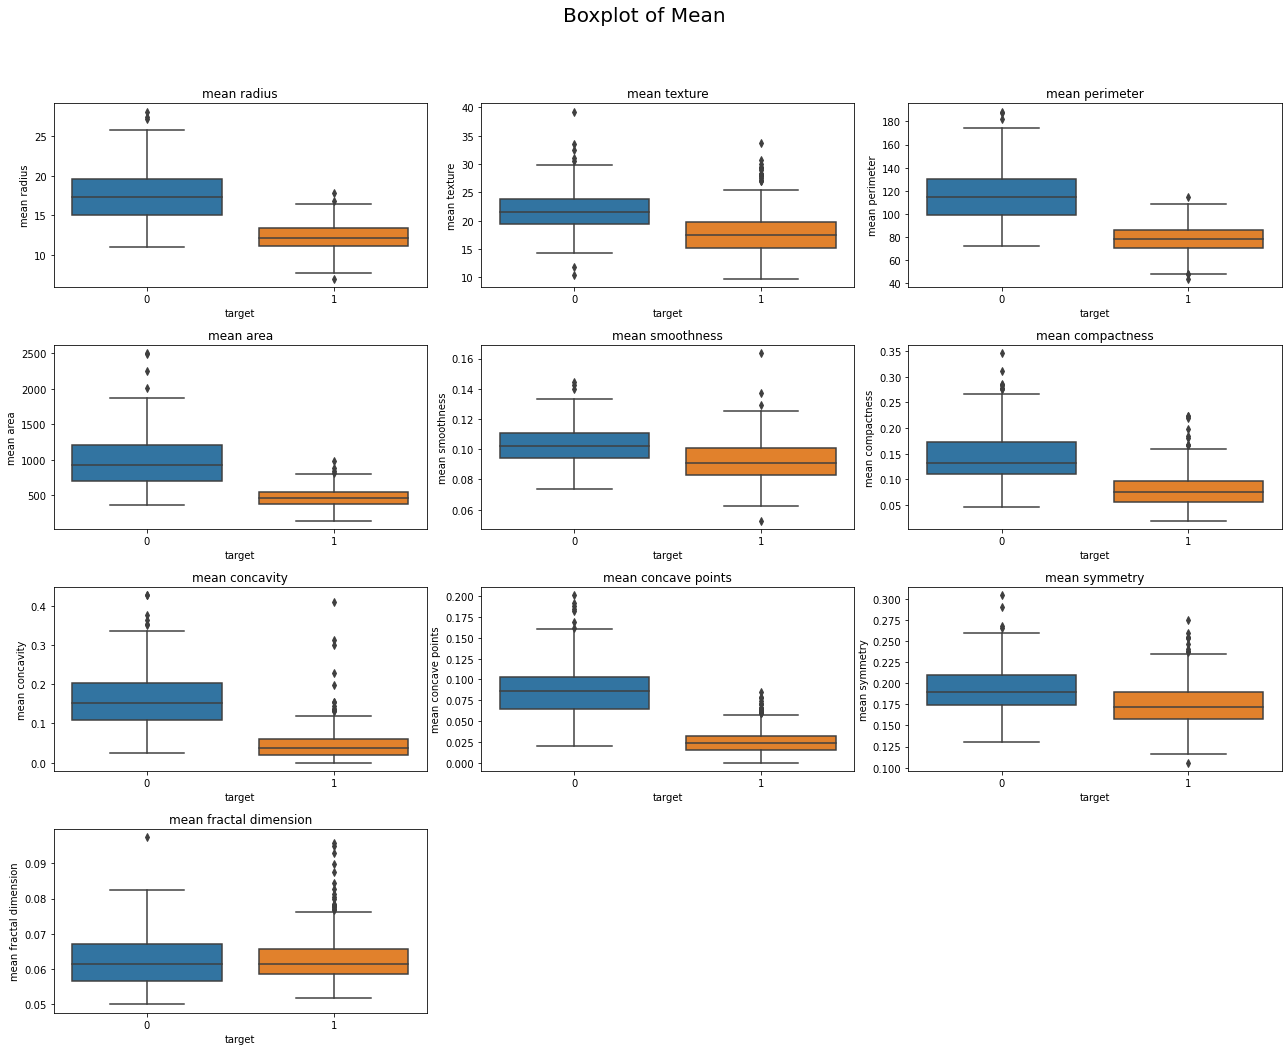

In [26]:
# box plot of all mean columns for cheaking outliers
fig = plt.figure(figsize = (18,14),tight_layout=True)
# Enumerate starting at 0 to 10, add 1 for subplotting
for i,b in enumerate(list(df.columns[0:10])):
    i = i + 1
    ax = fig.add_subplot(4,3,i)
    sns.boxplot(x=df['target'],y=b,data=df)
    ax.set_title(b)
plt.suptitle('Boxplot of Mean', y=1.04, size=20)
plt.show()

### Data Preprocessing

In [40]:
corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.90)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 22 columns.


In [41]:
# drop target_names column from dataframe & assign to new variable df1
df1 = df.drop(['target_names'], axis=1)
# Replace column extra space to '_' underscore ( Its line create only avoid error for XGboost tree plot)
df1.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
# drop target column from dataframe
X= df1.drop(['target'], axis=1)
# copy target column from dataframe & assign to y      
y= df1["target"].copy() 

In [42]:
df1.head()

,mean_smoothness,mean_compactness,mean_symmetry,mean_fractal_dimension,texture_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,...,fractal_dimension_error,worst_texture,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,0.11840,0.27760,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,...,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,0.08474,0.07864,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,...,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,0.10960,0.15990,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,...,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,0.14250,0.28390,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,...,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,0.10030,0.13280,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,...,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [43]:
X.head()

,mean_smoothness,mean_compactness,mean_symmetry,mean_fractal_dimension,texture_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_texture,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0.11840,0.27760,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0.08474,0.07864,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0.10960,0.15990,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0.14250,0.28390,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0.10030,0.13280,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
y.tail()

564    0
565    0
566    0
567    0
568    1
Name: target, dtype: int32

### PCA

#### Using Standard Scaler

In [47]:
scaler = preprocessing.StandardScaler().fit(X)
X_standardised = scaler.transform(X)

In [48]:
X_standardised

array([[ 1.56846633e+00,  3.28351467e+00,  2.21751501e+00, ...,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [-8.26962447e-01, -4.87071673e-01,  1.39236330e-03, ...,
         1.08708430e+00, -2.43889668e-01,  2.81189987e-01],
       [ 9.42210440e-01,  1.05292554e+00,  9.39684817e-01, ...,
         1.95500035e+00,  1.15225500e+00,  2.01391209e-01],
       ...,
       [-8.40483881e-01, -3.86796697e-02, -8.09117071e-01, ...,
         4.14068691e-01, -1.10454895e+00, -3.18409158e-01],
       [ 1.52576706e+00,  3.27214378e+00,  2.13719425e+00, ...,
         2.28998549e+00,  1.91908301e+00,  2.21963528e+00],
       [-3.11208479e+00, -1.15075248e+00, -8.20069901e-01, ...,
        -1.74506282e+00, -4.81382136e-02, -7.51206693e-01]])

#### PCA Variable

In [49]:
principal_component_analysis = PCA(n_components = 3)
results = principal_component_analysis.fit(X_standardised)
results_transformed = results.transform(X_standardised)

In [50]:
results_transformed

array([[ 7.3717774 , -1.4544338 , -1.05431181],
       [-0.5526289 , -2.17527935,  0.91374422],
       [ 3.26260575, -1.85763398,  0.57615714],
       ...,
       [-0.20924639, -1.11696541,  1.83955332],
       [ 8.13751096, -2.06764507, -0.37582027],
       [-4.44628907,  0.9185743 ,  0.45791313]])

In [51]:
pca_dataframe = pd.DataFrame(data = results_transformed)

In [52]:
pca_dataframe

,0,1,2
0,7.371777,-1.454434,-1.054312
1,-0.552629,-2.175279,0.913744
2,3.262606,-1.857634,0.576157
3,11.435339,2.494598,-5.455442
4,1.013867,-0.258889,1.602642
...,...,...,...
564,1.645574,-1.673853,3.178846
565,0.159357,-1.374720,3.081404
566,-0.209246,-1.116965,1.839553
567,8.137511,-2.067645,-0.375820


### Decision Trees

In [54]:
from sklearn.tree import DecisionTreeClassifier

#### Entire Dataset

In [55]:
model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = tts(X, y)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("The accuracy is : {}".format(accuracy))

The accuracy is : 0.9230769230769231


In [56]:
model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = tts(pca_dataframe, y)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("The accuracy is : {}".format(accuracy))

The accuracy is : 0.916083916083916


In [57]:
def performDecisionTree(X, mode, n_components = 3):
    
    principal_component_analysis = PCA(n_components = n_components, random_state = 23)
    results_transformed = results.fit_transform(X_standardised)
    pca_dataframe = pd.DataFrame(data = results_transformed)
    
    if mode == "PCA":
        X = pca_dataframe
    elif mode == "X":
        X = X
    elif mode == "X_Standardised":
        X = X_standardised
    
    model = DecisionTreeClassifier()
    X_train, X_test, y_train, y_test = tts(X, y, random_state= 49)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return accuracy_score(y_test, y_pred)


In [58]:
for m in ["PCA", "X", "X_Standardised"]:
    if m =="PCA":
        for i in range(1, 5):
            print("Mode: {}, PCA Components: {}, Accuracy Score : {}".format(m, i, performDecisionTree(X, m, i)))
    else:
        print("Mode: {}, Accuracy Score : {}".format(m, performDecisionTree(X, m, i)))


Mode: PCA, PCA Components: 1, Accuracy Score : 0.8881118881118881
Mode: PCA, PCA Components: 2, Accuracy Score : 0.8881118881118881
Mode: PCA, PCA Components: 3, Accuracy Score : 0.9020979020979021
Mode: PCA, PCA Components: 4, Accuracy Score : 0.8951048951048951
Mode: X, Accuracy Score : 0.951048951048951
Mode: X_Standardised, Accuracy Score : 0.9440559440559441


### LDA

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [60]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy -> ' + str(accuracy_score(y_test, y_pred)))

[[48  4]
 [ 2 89]]
Accuracy -> 0.958041958041958


## Part C. "PCA could be used in applications such as Image Processing, to reduce the complexity of data and improve performance or to compress images". Justify this statement with your own findings.

 - Dimensionality reduction refers to techniques for reducing the number of input variables in training data. When dealing with high dimensional data, it is often useful to reduce the dimensionality by projecting the data to a lower dimensional subspace which captures the “essence” of the data.
 - Dimensionality reduction is the mapping of data from a high dimensional space to a lower dimension space such that the result obtained by analyzing the reduced dataset is a good approximation to the result obtained by analyzing the original data set.
 - It reduces the time and storage space required. It helps Remove multi-collinearity which improves the interpretation of the parameters of the machine learning model. It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D.
 - Principal Component Analysis (PCA) is very useful to speed up the computation by reducing the dimensionality of the data. Plus, when you have high dimensionality with high correlated variable of one another, the PCA can improve the accuracy of classification model.

### Conclusion

 - LDA tries to reduce the dimensionality by taking into consideration the information that discriminates the output classes. LDA tries to find the decision boundary around each cluster of class.
 - It projects the data points to new dimension in a way that the clusters are as seperate from each other as possible and individual elements within a class are as close to the centroid as possible.
 - In other words, the inter-class seperability is increased in LDA. Intra-class seperability is reduced.

### References

 ##### PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
https://towardsdatascience.com/principal-component-analysis-for-breast-cancer-data-with-r-and-python-b312d28e911f
https://www.kaggle.com/jahirmorenoa/pca-to-the-breast-cancer-data-set
https://www.youtube.com/watch?v=e2sM7ccaA9c&ab_channel=DigitalSreeni
https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118
https://www.kaggle.com/mirzarahim/introduction-to-pca-image-compression-example
https://github.com/gtraskas/breast_cancer_prediction/blob/master/breast_cancer.ipynb

##### LDA
http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
https://machinelearningmastery.com/linear-discriminant-analysis-with-python/
https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2
https://www.mygreatlearning.com/blog/linear-discriminant-analysis-or-lda/
https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/